# About Dataset
The Dataset includes more than 2000 images with 300x300 resolution, which are totally clean.
Perfect for multiclass classification.

cloth --> Cloth face mask images
n95 --> N95 face mask images
n95v --> N95 with Valve face mask images
nfm --> No Face Mask images
srg --> Surgical face mask images

Also, the Train and Test sets are separated.

Download from -->datasets/bahadoreizadkhah
https://www.kaggle.com/datasets/bahadoreizadkhah/face-mask-types-dataset/download?datasetVersionNumber=1


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
loc="Dataset/train"
img_loc=os.listdir(loc)

In [3]:
print(img_loc)

['cloth', 'n95', 'n95v', 'nfm', 'srg']


In [4]:
for img in img_loc:
    print(os.path.join(loc,img))

Dataset/train\cloth
Dataset/train\n95
Dataset/train\n95v
Dataset/train\nfm
Dataset/train\srg


In [21]:
loc2="Dataset/test"
img_loc=os.listdir(loc2)

In [22]:
print(img_loc)

['cloth', 'n95', 'n95v', 'nfm', 'srg']


In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  loc,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1956 files belonging to 5 classes.
Using 1565 files for training.


In [23]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  loc2,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 330 files belonging to 5 classes.
Using 66 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['cloth', 'n95', 'n95v', 'nfm', 'srg']


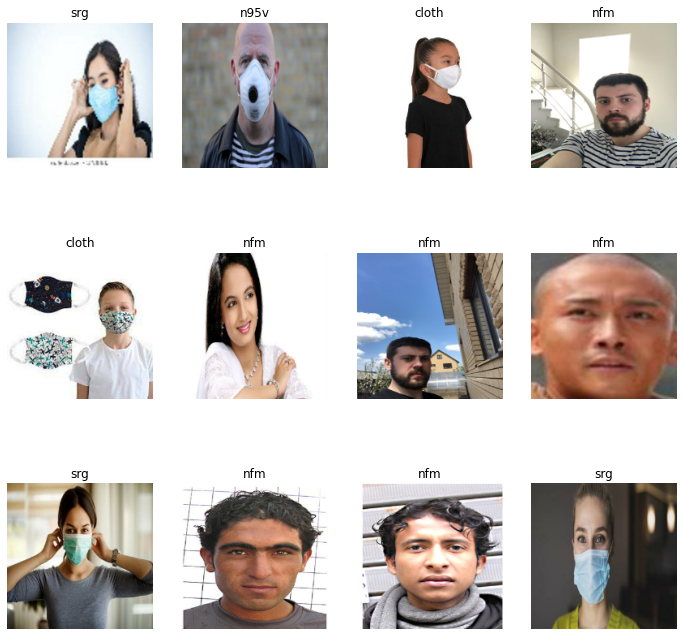

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [10]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)

In [11]:
from keras.layers.core import Dense,Flatten

vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(5, activation='softmax'))

In [12]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 5)                 2

In [15]:
from tensorflow.keras.optimizers import Adam

vgg_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = vgg_model.fit(train_ds, validation_data=val_ds, epochs=1)

C:\Users\DELL\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


49/49 [==============================] - 738s 15s/step - loss: 1.1622 - accuracy: 0.6371 - val_loss: 0.6752 - val_accuracy: 0.7340


In [18]:
vgg_model.evaluate(train_ds)

49/49 [==============================] - 598s 12s/step - loss: 0.4141 - accuracy: 0.8575


[0.4140898883342743, 0.8575080037117004]

In [ ]:
#test dataset accuary

In [28]:
pred=vgg_model.evaluate(val_ds)

3/3 [==============================] - 21s 6s/step - loss: 0.7699 - accuracy: 0.7273
